# YOLOv9 - Object Detection


This script uses the YOLOv9 model, published by **Chien-Yao Wang et al. in February 2024**, to detect and predict object categories in videos and images.

YOLOv9 uses deep learning concepts and concepts such as **Programmable Gradient Information (PGI)** and **Generalized Efficient Layer Aggregation Network (GELAN)** for object detection, image segmentation, and classification tasks.

You can check out the project's repository to learn more about this model: https://github.com/WongKinYiu/yolov9

## Step 1 - Install Dependencies

In [1]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 14.3 MB/s eta 0:00:00


## Step 2 - Model Selection

YOLOv9 offers multiple pre-trained models tested on the MS COCO dataset. You can check the available models here: https://github.com/WongKinYiu/yolov9?tab=readme-ov-file#performance

In [2]:
# Import dependencies
import cv2
from ultralytics import YOLO

# Instantiate model
model = YOLO("yolov9e.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 112M/112M [00:01<00:00, 107MB/s]


## Step 3 - Functions to Detect and Predict Objects in Images

In [35]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=2):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            # Draws a rectangle around a detected object.
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)

            # Writes the detected object name over the rectangle.
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), text_thickness)

    return img, results

## Step 4 - Function to Write Video with Detected Objects

The following helper function creates a video writes using OpenCV to output a new video including detected objects.

In [30]:
def create_video_writer(video_cap, output_filename):
    # Finds video witdth, height, and FPS rate from the video stream
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # Initializes FourCC object and another object to write the output video
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))
    return writer

## Step 5 - Functions to Call Object Detection on Images and Videos

You can reuse the following functions to detect objects in images and videos. In this example, I load data from Google Drive to show sample results based on the object detection logic.

In [24]:
# Function to plot images using Google Colab
from google.colab.patches import cv2_imshow

In [25]:
def detect_objects_in_image(source_image_path, output_image_path, plot=True):
  source_image = cv2.imread(source_image_path)
  result_img, _ = predict_and_detect(model, source_image, classes=[], conf=0.5)

  if(result_img.any()):
    cv2.imwrite(output_image_path, result_img)

  if(result_img.any() and plot):
    cv2_imshow(result_img)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [31]:
def detect_objects_in_video(source_video_path, output_video_path):
  cap = cv2.VideoCapture(source_video_path)

  if not cap.isOpened():
      print("Could not open video.")
  else:
      writer = create_video_writer(cap, output_video_path)

      if not writer.isOpened():
          print("Could not create video writer.")
      else:
          while True:
              success, img = cap.read()
              if not success:
                  break
              result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
              writer.write(result_img)
              cv2.waitKey(1)

          writer.release()
          cap.release()
          cv2.destroyAllWindows()

## Step 6 - Test Functionalities

In [6]:
# First, let's mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



0: 448x640 4 persons, 1 sports ball, 3150.1ms
Speed: 4.9ms preprocess, 3150.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


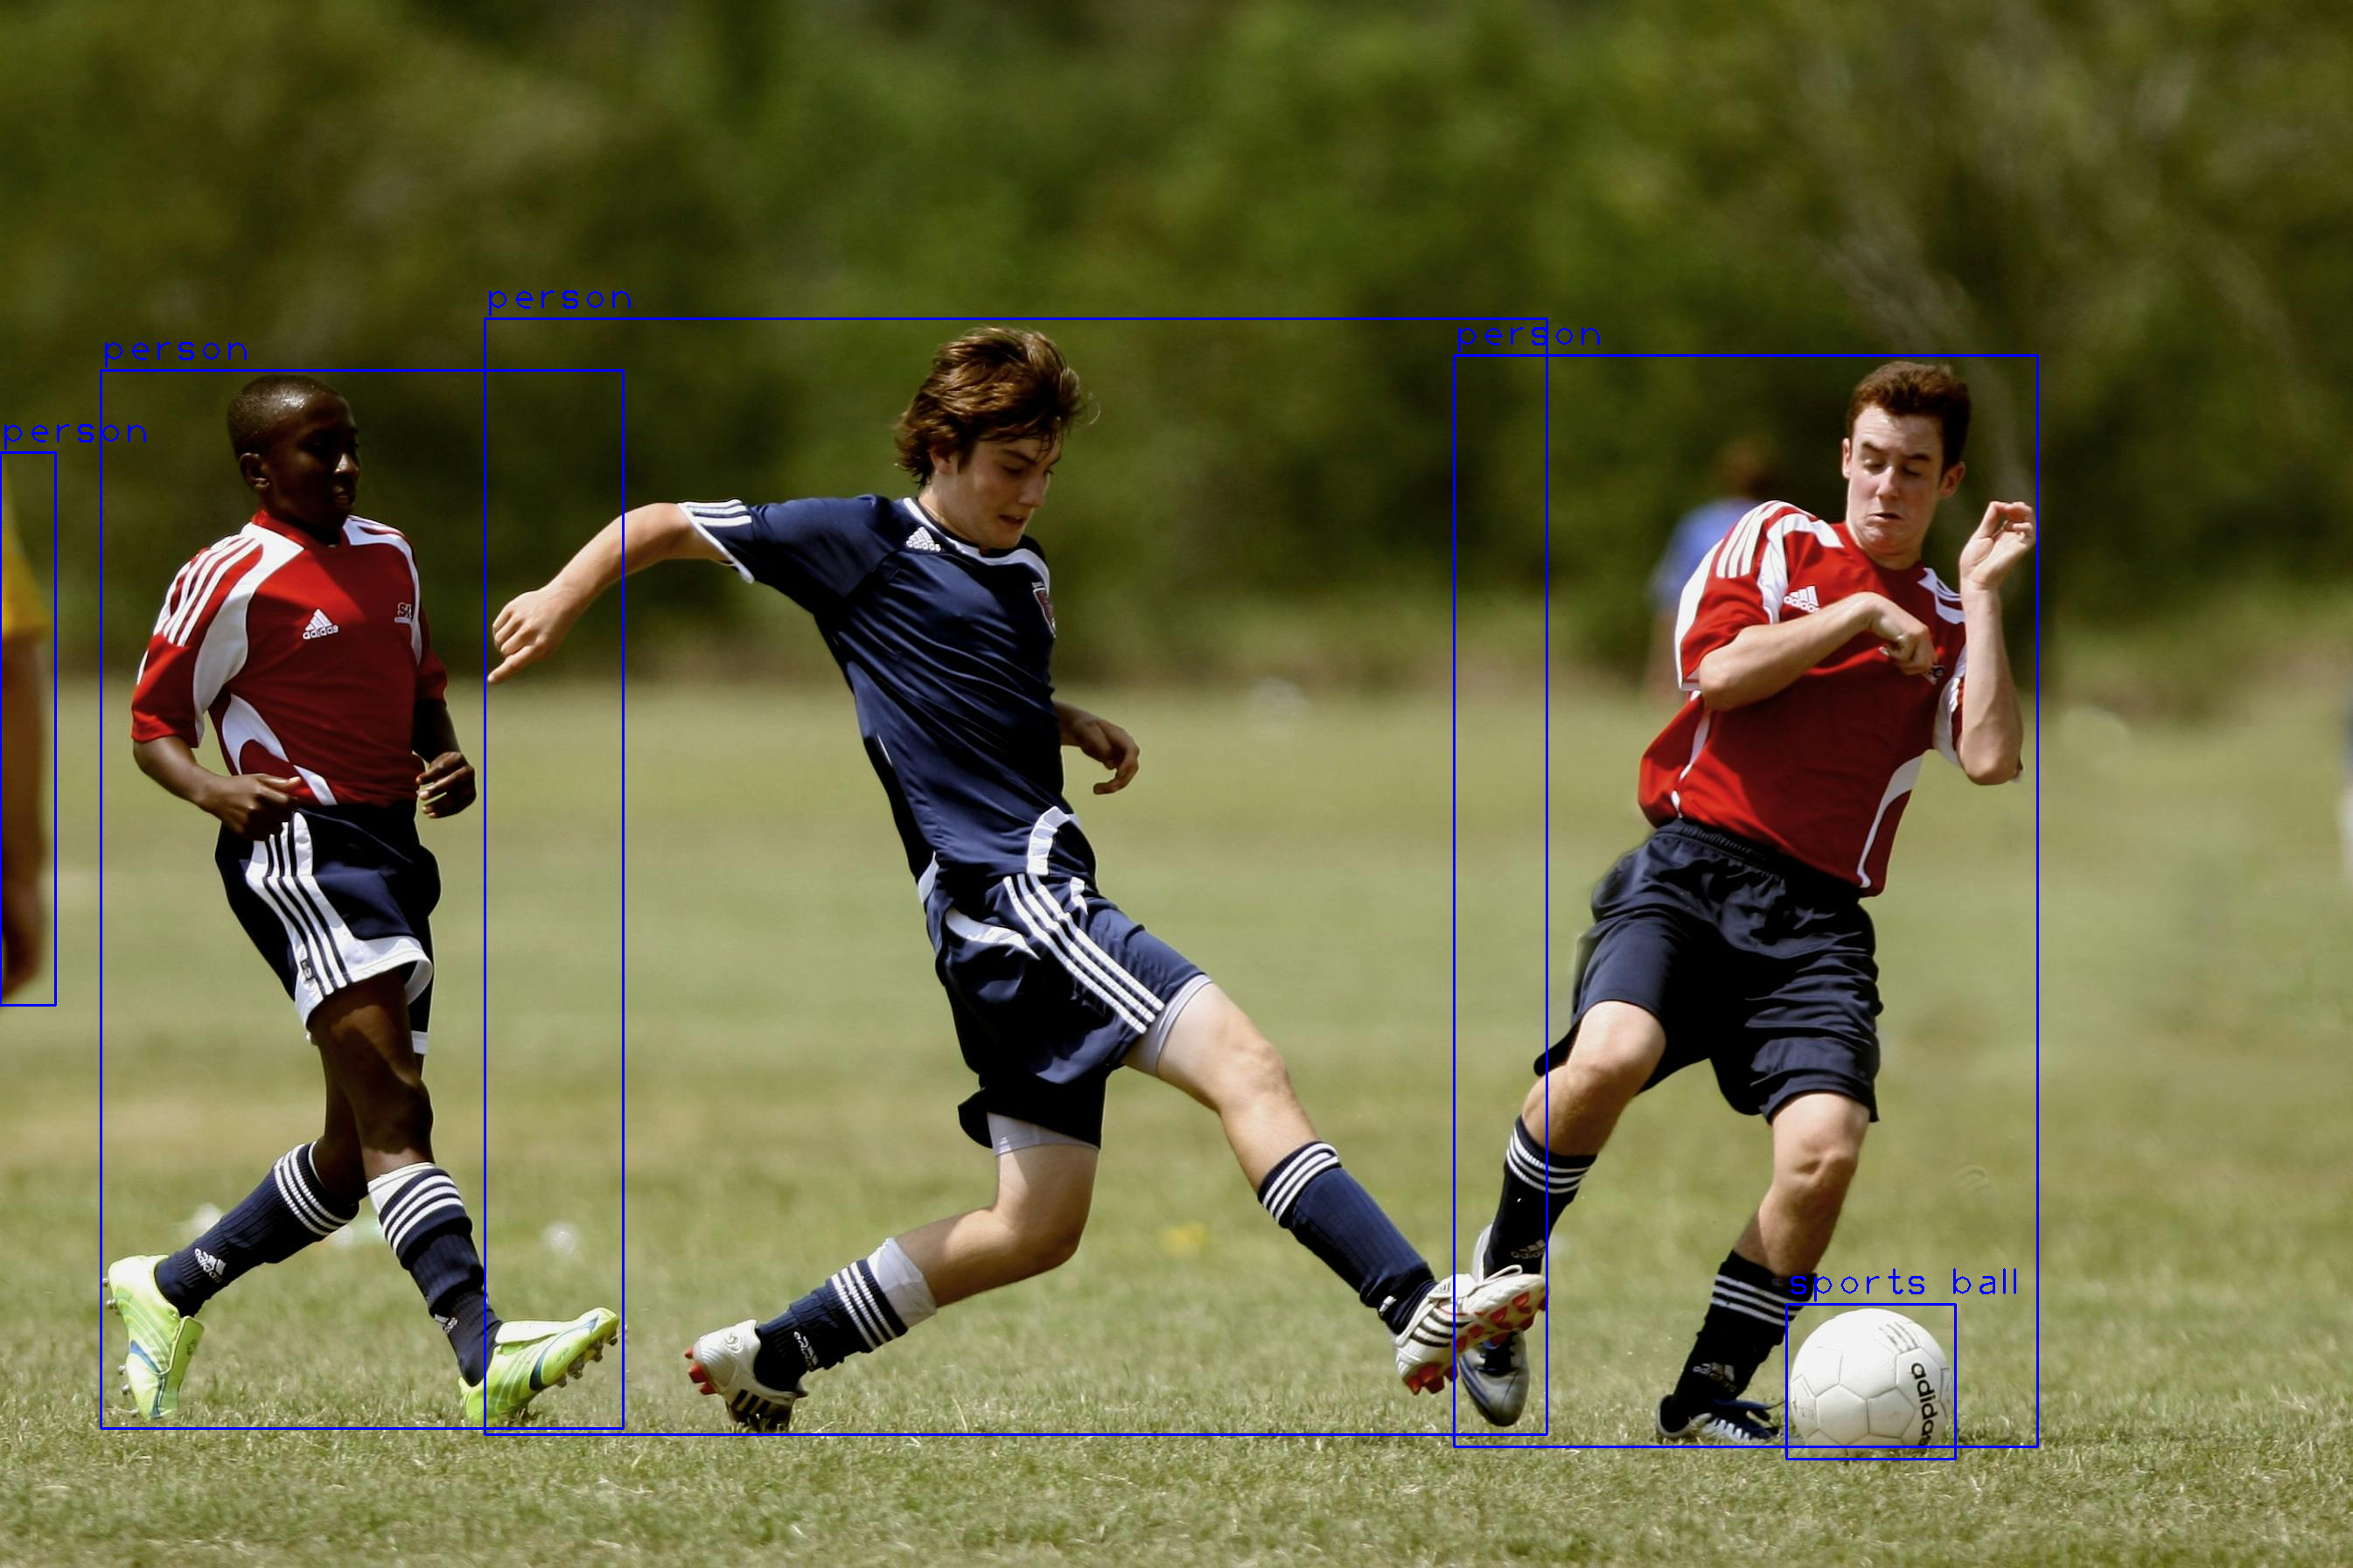

In [36]:
# Now let's test object detection in images (make sure to add images to a valid Google Drive path)
source_image_1_path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Images/image-1.jpg'
output_image_1_path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Images/image-1-output.jpg'
detect_objects_in_image(source_image_1_path, output_image_1_path, True)


In [32]:
# Video detection can take some time to finish depending on the video size and frame rate. The output video is added to Google Drive in the specified path.
source_video_1_path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Videos/video-1.mp4'
output_video_1_path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Videos/video-1-output.mp4'
detect_objects_in_video(source_video_1_path, output_video_1_path)



0: 640x352 2 persons, 1 couch, 1 laptop, 2418.0ms
Speed: 5.4ms preprocess, 2418.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 2501.4ms
Speed: 4.1ms preprocess, 2501.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 3791.6ms
Speed: 3.7ms preprocess, 3791.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 2426.9ms
Speed: 4.0ms preprocess, 2426.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 2286.5ms
Speed: 3.6ms preprocess, 2286.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 2278.4ms
Speed: 3.6ms preprocess, 2278.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 persons, 1 couch, 1 laptop, 2304.1ms
Speed: 3.8ms preprocess, 2304.1ms inference, 1.0m